In [1]:
from __future__ import division
from __future__ import print_function

import time
import numpy as np

import torch
import torch.nn.functional as F
import torch.optim as optim

from utils import load_data, test, run_experiment
from models import GCN_2, GCN_3, ite_GCN

In [2]:
adj, features, labels = load_data(path="../data/cora/", dataset="cora")

Loading cora dataset...


In [3]:
idx_train = range(140)
idx_val = range(200, 500)
idx_test = range(500, 1500)
idx_train = torch.LongTensor(idx_train)
idx_val = torch.LongTensor(idx_val)
idx_test = torch.LongTensor(idx_test)

In [4]:
hidden = 16
dropout = 0.5
lr = 0.01
weight_decay = 5e-4
num_epochs = 200

Intialize a 2-layer GCN
runrunrun!
Epoch: 0001 loss_train: 1.9659 acc_train: 0.1214 loss_val: 1.9450 acc_val: 0.1133 time: 0.0530s
Epoch: 0002 loss_train: 1.9559 acc_train: 0.1214 loss_val: 1.9360 acc_val: 0.1133 time: 0.0115s
Epoch: 0003 loss_train: 1.9507 acc_train: 0.1357 loss_val: 1.9270 acc_val: 0.1167 time: 0.0099s
Epoch: 0004 loss_train: 1.9371 acc_train: 0.1429 loss_val: 1.9179 acc_val: 0.1400 time: 0.0072s
Epoch: 0005 loss_train: 1.9265 acc_train: 0.2429 loss_val: 1.9088 acc_val: 0.3433 time: 0.0085s
Epoch: 0006 loss_train: 1.9180 acc_train: 0.2500 loss_val: 1.8996 acc_val: 0.3500 time: 0.0073s
Epoch: 0007 loss_train: 1.9158 acc_train: 0.2429 loss_val: 1.8905 acc_val: 0.3500 time: 0.0077s
Epoch: 0008 loss_train: 1.9072 acc_train: 0.2857 loss_val: 1.8814 acc_val: 0.3500 time: 0.0104s
Epoch: 0009 loss_train: 1.8971 acc_train: 0.2571 loss_val: 1.8722 acc_val: 0.3500 time: 0.0084s
Epoch: 0010 loss_train: 1.8882 acc_train: 0.2929 loss_val: 1.8628 acc_val: 0.3500 time: 0.0075s
Epoch

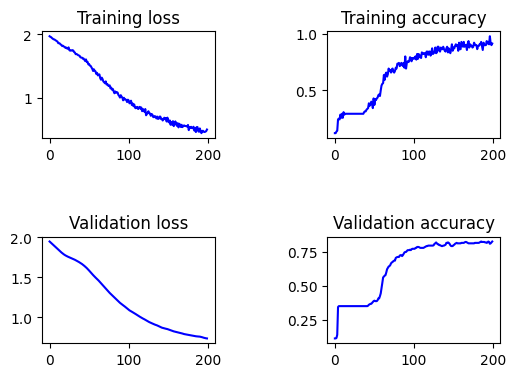

In [5]:
model0 = GCN_2(nfeat=features.shape[1],
            nhid=hidden,
            nclass=labels.max().item() + 1,
            dropout=dropout
)
run_experiment(num_epochs=num_epochs, model=model0, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)


Intialize a 3-layer GCN
runrunrun!
Epoch: 0001 loss_train: 1.9176 acc_train: 0.2000 loss_val: 1.8835 acc_val: 0.3500 time: 0.0164s
Epoch: 0002 loss_train: 1.8946 acc_train: 0.2786 loss_val: 1.8628 acc_val: 0.3500 time: 0.0171s
Epoch: 0003 loss_train: 1.9064 acc_train: 0.3000 loss_val: 1.8452 acc_val: 0.3500 time: 0.0114s
Epoch: 0004 loss_train: 1.8446 acc_train: 0.2857 loss_val: 1.8295 acc_val: 0.3500 time: 0.0109s
Epoch: 0005 loss_train: 1.8583 acc_train: 0.2929 loss_val: 1.8154 acc_val: 0.3500 time: 0.0107s
Epoch: 0006 loss_train: 1.8674 acc_train: 0.2929 loss_val: 1.8037 acc_val: 0.3500 time: 0.0100s
Epoch: 0007 loss_train: 1.8288 acc_train: 0.2929 loss_val: 1.7933 acc_val: 0.3500 time: 0.0099s
Epoch: 0008 loss_train: 1.8272 acc_train: 0.2929 loss_val: 1.7851 acc_val: 0.3500 time: 0.0100s
Epoch: 0009 loss_train: 1.8146 acc_train: 0.2929 loss_val: 1.7785 acc_val: 0.3500 time: 0.0102s
Epoch: 0010 loss_train: 1.7948 acc_train: 0.2929 loss_val: 1.7732 acc_val: 0.3500 time: 0.0098s
Epoch

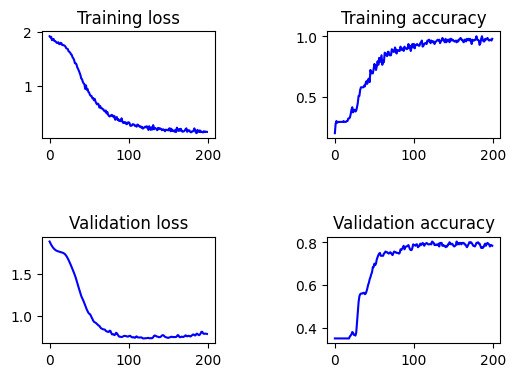

In [6]:
model1 = GCN_3(nfeat=features.shape[1],
            nhid=hidden,
            nclass=labels.max().item() + 1,
            dropout=dropout)
run_experiment(num_epochs=num_epochs, model=model1, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)


Unspecified or invalid number of iterations for inference. Treat as the same as training iterations.
Initialize a 1-layer GCN with  2 iterations
Gradient flows to all iterations:  True
runrunrun!
Epoch: 0001 loss_train: 1.9455 acc_train: 0.1857 loss_val: 1.9401 acc_val: 0.2400 time: 0.4445s
Epoch: 0002 loss_train: 1.9393 acc_train: 0.2786 loss_val: 1.9335 acc_val: 0.3900 time: 0.4391s
Epoch: 0003 loss_train: 1.9313 acc_train: 0.3714 loss_val: 1.9264 acc_val: 0.3500 time: 0.4860s
Epoch: 0004 loss_train: 1.9245 acc_train: 0.3357 loss_val: 1.9184 acc_val: 0.3500 time: 0.4450s
Epoch: 0005 loss_train: 1.9140 acc_train: 0.3000 loss_val: 1.9090 acc_val: 0.3500 time: 0.5953s
Epoch: 0006 loss_train: 1.9052 acc_train: 0.3000 loss_val: 1.8979 acc_val: 0.3500 time: 0.4284s
Epoch: 0007 loss_train: 1.8932 acc_train: 0.2929 loss_val: 1.8846 acc_val: 0.3500 time: 0.4221s
Epoch: 0008 loss_train: 1.8792 acc_train: 0.2929 loss_val: 1.8693 acc_val: 0.3500 time: 0.4117s
Epoch: 0009 loss_train: 1.8619 acc_t

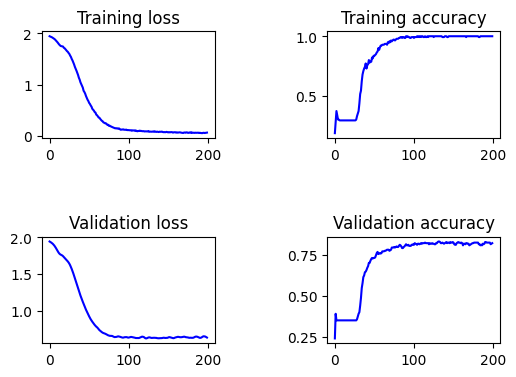

In [7]:
lr = 0.002
weight_decay = 1e-4
smooth_fac = 0.8

model2 = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=dropout,
            train_nite= 2,
            eval_nite= 0,
            allow_grad=True,
            smooth_fac=smooth_fac)
run_experiment(num_epochs=num_epochs, model=model2, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)

Unspecified or invalid number of iterations for inference. Treat as the same as training iterations.
Initialize a 1-layer GCN with  3 iterations
Gradient flows to all iterations:  True
runrunrun!
Epoch: 0001 loss_train: 1.9438 acc_train: 0.2429 loss_val: 1.9353 acc_val: 0.3500 time: 0.8275s
Epoch: 0002 loss_train: 1.9348 acc_train: 0.3000 loss_val: 1.9256 acc_val: 0.3500 time: 0.7790s
Epoch: 0003 loss_train: 1.9251 acc_train: 0.2929 loss_val: 1.9141 acc_val: 0.3500 time: 0.7147s
Epoch: 0004 loss_train: 1.9141 acc_train: 0.2929 loss_val: 1.8991 acc_val: 0.3500 time: 1.1535s
Epoch: 0005 loss_train: 1.8999 acc_train: 0.2929 loss_val: 1.8798 acc_val: 0.3500 time: 0.7132s
Epoch: 0006 loss_train: 1.8812 acc_train: 0.2929 loss_val: 1.8556 acc_val: 0.3500 time: 0.8940s
Epoch: 0007 loss_train: 1.8547 acc_train: 0.2929 loss_val: 1.8276 acc_val: 0.3500 time: 1.0133s
Epoch: 0008 loss_train: 1.8314 acc_train: 0.2929 loss_val: 1.7999 acc_val: 0.3500 time: 0.7741s
Epoch: 0009 loss_train: 1.8051 acc_t

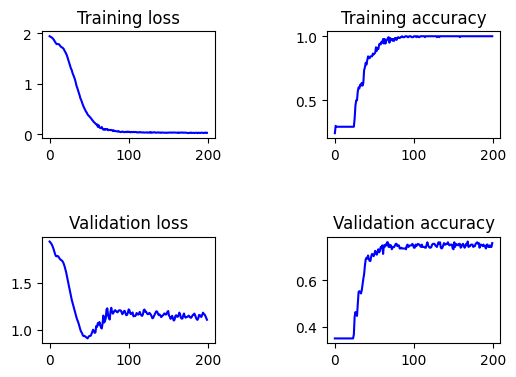

In [8]:
model3 = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=dropout,
            train_nite= 3,
            eval_nite= 0,
            allow_grad=True,
            smooth_fac=smooth_fac)
run_experiment(num_epochs=num_epochs, model=model3, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)

Unspecified or invalid number of iterations for inference. Treat as the same as training iterations.
Initialize a 1-layer GCN with  2 iterations
Gradient flows to all iterations:  False
runrunrun!
Epoch: 0001 loss_train: 1.9453 acc_train: 0.1857 loss_val: 1.9393 acc_val: 0.3533 time: 0.5063s
Epoch: 0002 loss_train: 1.9383 acc_train: 0.3286 loss_val: 1.9331 acc_val: 0.3500 time: 0.3307s
Epoch: 0003 loss_train: 1.9318 acc_train: 0.3286 loss_val: 1.9263 acc_val: 0.3500 time: 0.3499s
Epoch: 0004 loss_train: 1.9253 acc_train: 0.2929 loss_val: 1.9187 acc_val: 0.3500 time: 0.3450s
Epoch: 0005 loss_train: 1.9177 acc_train: 0.3000 loss_val: 1.9098 acc_val: 0.3500 time: 0.3406s
Epoch: 0006 loss_train: 1.9086 acc_train: 0.2929 loss_val: 1.8994 acc_val: 0.3500 time: 0.3406s
Epoch: 0007 loss_train: 1.8976 acc_train: 0.2929 loss_val: 1.8872 acc_val: 0.3500 time: 0.3364s
Epoch: 0008 loss_train: 1.8832 acc_train: 0.2929 loss_val: 1.8732 acc_val: 0.3500 time: 0.3446s
Epoch: 0009 loss_train: 1.8703 acc_

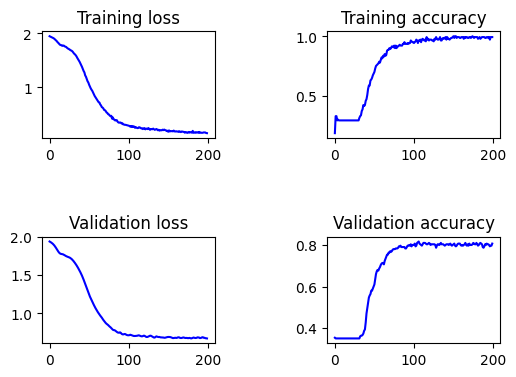

In [9]:

model4 = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=dropout,
            train_nite= 2,
            eval_nite= 0,
            allow_grad=False,
            smooth_fac=smooth_fac)
run_experiment(num_epochs=num_epochs, model=model4, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)

Unspecified or invalid number of iterations for inference. Treat as the same as training iterations.
Initialize a 1-layer GCN with  3 iterations
Gradient flows to all iterations:  False
runrunrun!
Epoch: 0001 loss_train: 1.9457 acc_train: 0.1286 loss_val: 1.9361 acc_val: 0.3500 time: 0.6194s
Epoch: 0002 loss_train: 1.9357 acc_train: 0.2857 loss_val: 1.9266 acc_val: 0.3500 time: 0.4649s
Epoch: 0003 loss_train: 1.9273 acc_train: 0.2929 loss_val: 1.9159 acc_val: 0.3500 time: 0.4432s
Epoch: 0004 loss_train: 1.9162 acc_train: 0.3000 loss_val: 1.9029 acc_val: 0.3500 time: 0.4430s
Epoch: 0005 loss_train: 1.9064 acc_train: 0.2929 loss_val: 1.8863 acc_val: 0.3500 time: 0.4609s
Epoch: 0006 loss_train: 1.8885 acc_train: 0.2929 loss_val: 1.8660 acc_val: 0.3500 time: 0.5094s
Epoch: 0007 loss_train: 1.8677 acc_train: 0.2929 loss_val: 1.8426 acc_val: 0.3500 time: 0.5312s
Epoch: 0008 loss_train: 1.8476 acc_train: 0.2929 loss_val: 1.8185 acc_val: 0.3500 time: 0.5271s
Epoch: 0009 loss_train: 1.8258 acc_

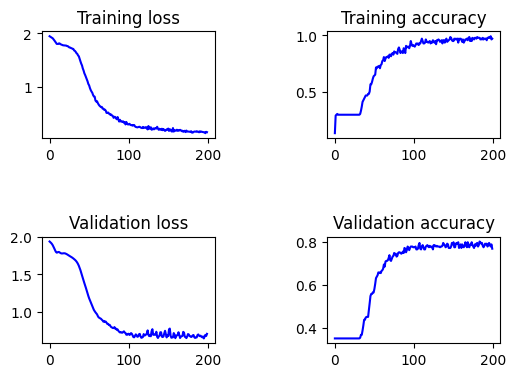

In [10]:
model5 = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=dropout,
            train_nite= 3,
            eval_nite= 0,
            allow_grad=False,
            smooth_fac=smooth_fac)
run_experiment(num_epochs=num_epochs, model=model5, lr=lr, weight_decay=weight_decay, features=features, adj=adj, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test, labels=labels)

In [11]:
test_losses = []
test_accuracies = []

for i in range(1, 30):
    model = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=dropout,
            train_nite= 2,
            eval_nite= i,
            allow_grad=True,
            smooth_fac=smooth_fac)
    model.load_state_dict(model2.state_dict().copy())
    loss_test, acc_test = test(model, features, adj, idx_test, labels)
    test_losses.append(loss_test.item())
    test_accuracies.append(acc_test.item())


Initialize a 1-layer GCN with  2 iterations
Gradient flows to all iterations:  True
Test set results: loss= 1.3968 accuracy= 0.7690
Testing time:  0.07615327835083008
Initialize a 1-layer GCN with  2 iterations
Gradient flows to all iterations:  True
Test set results: loss= 0.5981 accuracy= 0.8140
Testing time:  0.11374115943908691
Initialize a 1-layer GCN with  2 iterations
Gradient flows to all iterations:  True
Test set results: loss= 1.3043 accuracy= 0.8190
Testing time:  0.17728304862976074
Initialize a 1-layer GCN with  2 iterations
Gradient flows to all iterations:  True
Test set results: loss= 5.6357 accuracy= 0.7870
Testing time:  0.22846579551696777
Initialize a 1-layer GCN with  2 iterations
Gradient flows to all iterations:  True
Test set results: loss= 23.6548 accuracy= 0.7580
Testing time:  0.29418301582336426
Initialize a 1-layer GCN with  2 iterations
Gradient flows to all iterations:  True
Test set results: loss= 96.0850 accuracy= 0.7320
Testing time:  0.33920788764953

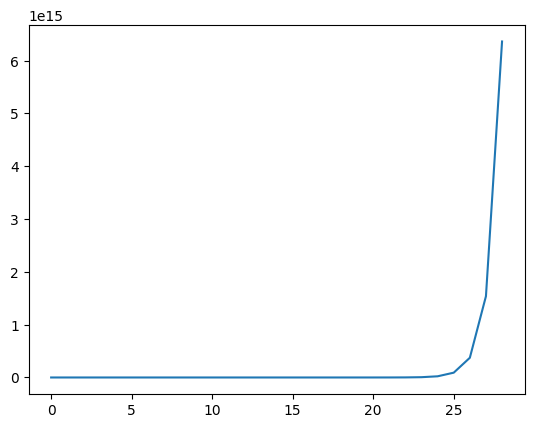

In [12]:
import matplotlib.pyplot as plt
plt.plot(test_losses)

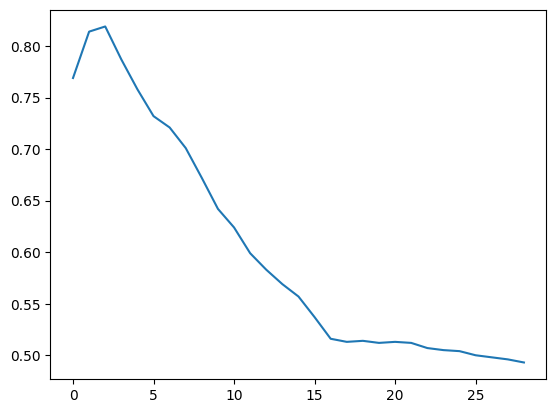

In [13]:
plt.plot(test_accuracies)

In [14]:
test_losses = []
test_accuracies = []

for i in range(1, 30):
    model = ite_GCN(nfeat=features.shape[1],
            nclass=labels.max().item() + 1,
            dropout=0,
            train_nite= 3,
            eval_nite= i,
            allow_grad=True,
            smooth_fac=smooth_fac)
    model.load_state_dict(model3.state_dict().copy())
    loss_test, acc_test = test(model, features, adj, idx_test, labels)
    test_losses.append(loss_test.item())
    test_accuracies.append(acc_test.item())


Initialize a 1-layer GCN with  3 iterations
Gradient flows to all iterations:  True
Test set results: loss= 1.7040 accuracy= 0.5700
Testing time:  0.15416812896728516
Initialize a 1-layer GCN with  3 iterations
Gradient flows to all iterations:  True
Test set results: loss= 1.1486 accuracy= 0.6570
Testing time:  0.12209105491638184
Initialize a 1-layer GCN with  3 iterations
Gradient flows to all iterations:  True
Test set results: loss= 1.0002 accuracy= 0.7510
Testing time:  0.19161486625671387
Initialize a 1-layer GCN with  3 iterations
Gradient flows to all iterations:  True
Test set results: loss= 3.9701 accuracy= 0.7410
Testing time:  0.3139798641204834
Initialize a 1-layer GCN with  3 iterations
Gradient flows to all iterations:  True
Test set results: loss= 22.8826 accuracy= 0.6710
Testing time:  0.39028382301330566
Initialize a 1-layer GCN with  3 iterations
Gradient flows to all iterations:  True
Test set results: loss= 137.7340 accuracy= 0.5340
Testing time:  0.43693780899047

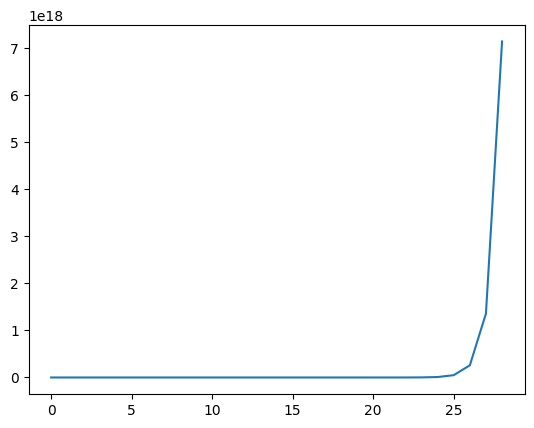

In [15]:
plt.plot(test_losses)

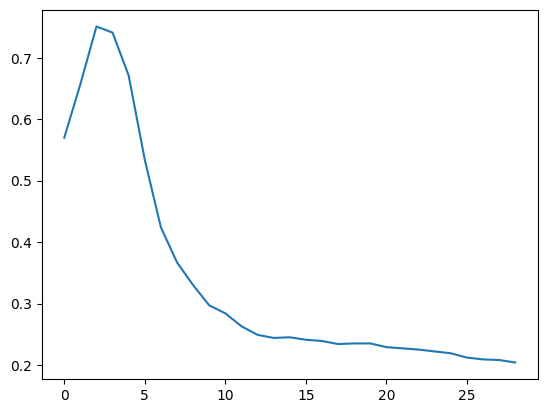

In [16]:
plt.plot(test_accuracies)